### STEP 2: Introducing and Loading the Dataset -- Esther

#### Installing and importing libraries

In [44]:
%pip install scipy
%pip install matplotlib
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install scikit-learn
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [45]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# For Downsampling Methods
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss

# For evaluating classifiers
from sklearn import metrics
from collections import Counter


import matplotlib.patches as mpatches
import time

In [23]:
# Load in the dataset from a csv
csv = pd.read_csv('data/creditcard.csv')

# Convert the data to a pandas dataframe
cc_data = pd.DataFrame(csv)

# Get the shape of the dataframe: (rows, columns)
cc_data.shape

(284807, 31)

In [24]:
# See the first five rows of the dataframe:
cc_data.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
73817,55292.0,1.442924,-1.139166,-1.468322,-3.916031,1.119842,2.670790,-0.979337,0.671150,0.592084,...,-0.652739,-1.494703,0.098917,0.940108,0.495263,-1.061400,0.089250,0.031969,32.61,0
206539,136247.0,-1.991231,0.487900,-0.085682,-1.993552,-0.919154,-0.704924,-0.250312,0.667762,-0.721902,...,0.277556,0.905175,-0.195885,-0.093248,0.035112,-0.220937,-0.069943,-0.212898,69.00,0
13003,22850.0,1.185276,-0.369013,0.998232,-0.555823,-1.021155,-0.320472,-0.775556,0.061202,3.205845,...,-0.136571,0.080233,0.004357,0.018708,0.376892,-0.694330,0.076837,0.025879,11.85,0
257032,157973.0,-0.773645,1.141878,-2.009409,-1.875093,3.263228,3.137326,0.876310,0.375236,0.765331,...,-0.046730,0.724459,-0.192385,0.651937,-0.270888,0.493430,-0.254469,-0.599785,28.21,0
249603,154492.0,-1.024415,1.315074,1.677018,1.112226,-0.266069,0.106310,0.230510,0.609961,-0.088495,...,-0.522518,-1.294793,-0.110685,-0.092275,0.391252,-0.776795,0.234801,0.077750,5.60,0


### STEP 3: Exploratory data analysis -- Ria

In [25]:
#recoding dataset 
print('No Frauds', round(cc_data['Class'].value_counts()[0]/len(cc_data) * 100,2), '% of the dataset')
print('Frauds', round(cc_data['Class'].value_counts()[1]/len(cc_data) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


/var/folders/mk/fsy7_c3n2wz82_zjfzvtfdcw0000gn/T/ipykernel_8569/372688849.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cc_data, x='Class', palette="bright")


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

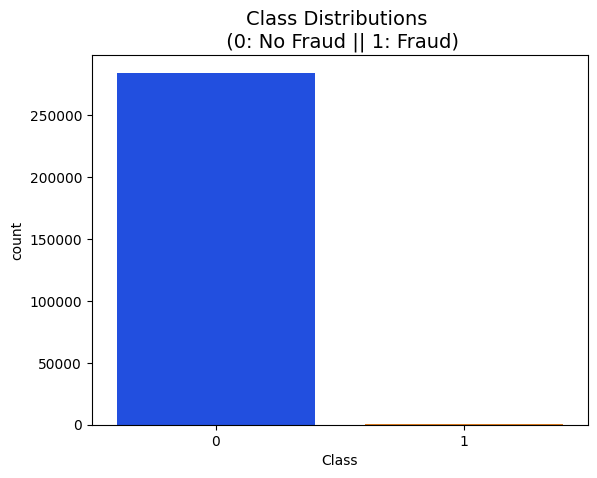

In [26]:
sns.countplot(data=cc_data, x='Class', palette="bright")
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

## STEP 4: Data Cleaning and Initializing The Model with sklearn (no undersampling) -- MILLER

### Data splitting

In [38]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# First, make a train-test split. We'll use this train-test split for all our models before we downsample.
# This splits the data into data the model is "trained" on, and validation data to test the accuracy of our model.

X_train, X_test, Y_train, Y_test = train_test_split(cc_data.iloc[:, :30], 
                                                    cc_data.iloc[:, 30],
                                                    test_size=0.3,
                                                    random_state=0)

### Data preparation and data cleaning

### WE'RE USING RANDOM FORESTS AS OUR CLASSIFIER

In [29]:
#compute the confusion matrix.
cm = confusion_matrix(Y_test, predictions)

 #Plot the confusion matrix.
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

NameError: name 'confusion_matrix' is not defined

## STEP 4b: Evaluation with Performance Metrics -- Alyssa

## STEP 5: Undersampling Techniques -- Esther (just write the general blurb for this)

### Random Downsampling -- Esther

In [46]:
# Randomly downsample the data
X_train_randdown, Y_train_randdown = RandomUnderSampler(random_state=0).fit_resample(X_train, Y_train)

In [49]:
# Compare dataset sizes
counter = Counter(Y_train)
total = counter[0] + counter[1]
print("Before using Random Downsampling")
print("Number of data points in class 0: ", counter[0])
print("Number of data points in class 1: ", counter[1])
print("Class 0: ", round(counter[0] / total * 100, 2), "%, Class 1: ", round(counter[1] / total * 100, 2), "%")

# Compare against undersampling dataset sizes
counter = Counter(Y_train_randdown)
total = counter[0] + counter[1]
print("After using Random Downsampling")
print("Number of data points in class 0: ", counter[0])
print("Number of data points in class 1: ", counter[1])
print("Class 0: ", round(counter[0] / total * 100, 2), "%, Class 1: ", round(counter[1] / total * 100, 2), "%")

Before using Random Downsampling
Number of data points in class 0:  199019
Number of data points in class 1:  345
Class 0:  99.83 %, Class 1:  0.17 %
After using Random Downsampling
Number of data points in class 0:  345
Number of data points in class 1:  345
Class 0:  50.0 %, Class 1:  50.0 %


In [ ]:
# Performance metrics
# First we want to start off getting the False Positive and True Positive rates
# This is so we can calculate the ROC curve
random_

### Spam and Ham Stuff


Note: Distribution of dataset indicates imbalanced data.

In [10]:
# Dropping all duplicate texts based off of results of EDA
df_no_dup = data.drop_duplicates(subset=['text'], keep='first')

NameError: name 'data' is not defined

In [ ]:
# Explore distribution of dataset 

# count plot on single categorical variable
ax = sns.countplot(x = df_no_dup['classification'], palette = 'rocket')

#add data labels
ax.bar_label(ax.containers[0])

# add plot title
plt.title("Observations by Classification Type")

# show plot
plt.show()

###  Near Miss Undersampling -- Ria

In [11]:
from imblearn.under_sampling import NearMiss

#Splitting the data into features and labels 
X = cc_data.iloc[:,:30]
y = cc_data.iloc[:, 30]

near_miss = NearMiss()
X_resample, y_resample = near_miss.fit_resample(X,y)

In [12]:
print("Before Undersampling, counts of label '1': {}".format(sum(y == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y == 0))) 
  
print("After Undersampling, counts of label '1': {}".format(sum(y_resample == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_resample == 0))) 

Before Undersampling, counts of label '1': 492
Before Undersampling, counts of label '0': 284315 

After Undersampling, counts of label '1': 492
After Undersampling, counts of label '0': 492


In [13]:
# Creating the classifier 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_val, y_train, y_val = train_test_split(X_resample, y_resample, test_size=0.2, random_state=45)

nm_model = LogisticRegression()
nm_model.fit(X_train, y_train)

nm_score = nm_model.score(X_val, y_val)
print(score)

0.9441624365482234


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Performance Metrics of Near Miss Undersampling

In [ ]:
# Run the test set through the model
nm_output = nm_model.predict_proba(X_val)

In [ ]:
# Get False Positive and True Positive rates for comparison
# 

### Tomek Link Undersampling -- Miller